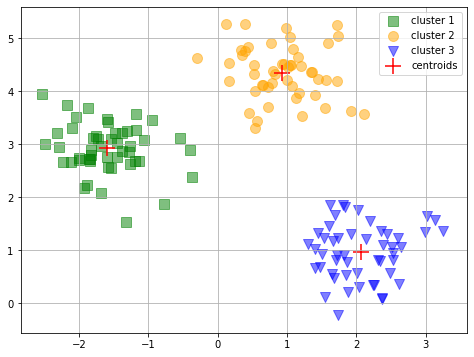

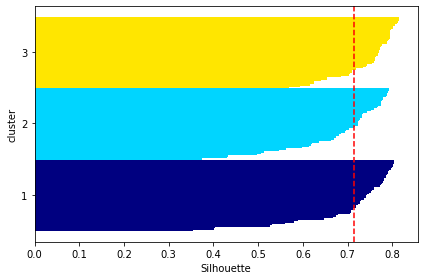

In [1]:
# KMeans Clustering : Silrouette 계수 확인
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples

from sklearn.cluster import KMeans 
import numpy as np
X, y =make_blobs (n_samples =150, n_features =2, centers=3, cluster_std =0.5,shuffle=True,random_state =0)
# Kmeans 알고리즘으로 시험용 데이터를 3 그룹으로 분류한다 (k =
km =KMeans (n_clusters =3, init ='random', n_init =100, max_iter =300,tol=1e-04, random_state =0)
km =km.fit (X)
y_km= km.predict (X)
plt.figure(figsize =(8,6))
plt.scatter( X[y_km == 0, 0], X[y_km == 0, 1], s=100, c='green',
marker='s', alpha=0.5, label='cluster 1')
plt.scatter( X[y_km == 1, 0], X[y_km == 1, 1], s=100, c='orange',
marker='o', alpha=0.5, label='cluster 2')
plt.scatter( X[y_km == 2, 0], X[y_km == 2, 1], s=100, c='blue',
marker='v', alpha=0.5, label='cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250,
marker='+', c='red', label='centroids')
plt.legend()
plt.grid()
plt.show()

cluster_labels= np.unique (y_km)
n_clusters= cluster_labels.shape[0]
silhouette_vals= silhouette_samples(X, y_km , metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks=[]

for i , c in enumerate(cluster_labels):
    c_silhouette_vals= silhouette_vals[ y_km ==c]
    c_silhouette_vals.sort()
    y_ax_upper+= len (c_silhouette_vals)
    color =plt.cm.jet(float ( i ) / n_clusters)
    plt.barh(range( y_ax_lower , y_ax_upper ), c_silhouette_vals , height=1.0,    edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper ) /2.)
    y_ax_lower+= len (c_silhouette_vals)

silhouette_avg= np.mean (silhouette_vals)
plt.axvline(silhouette_avg , color="red", linestyle ="--")
plt.yticks(yticks , cluster_labels +1)
plt.ylabel('cluster')
plt.xlabel('Silhouette')
plt.tight_layout()
plt.show()